5350 Thesis in Economics

Andres Cruz 25199 & Klara Holmer 25037 

Code for Grundskola

In [1]:
# Importing Libraries
import numpy as np 
import pandas as pd 
import glob
import os
import matplotlib.pyplot as plt

Grundskola - Slutbetyg per ämne årskurs 9, fr.o.m. 2012/13 till 2021/22

"De här statistikuppgifterna visar slutbetyg i respektive ämne i årskurs 9, vårterminen"

- Spring semester year is used in the name of the ExcelFile

In [2]:
# Step 1  -  Creating DataFrames for each specific subject for Grundskolan 

# Define the folder path
path = r'/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/data/grundskola_I'

# Get all Excel files in the folder
all_files = glob.glob(os.path.join(path, "*.xlsx"))

# Sort the files alphabetically
all_files.sort()

# Predefined list of years (ensure this list matches the number of files and in the right order of how python reads the folder (ascending or descending))
LÄSÅR = ['2014/15', '2015/16', '2016/17','2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

# Defining a function
def read_excel_files(sheet_name):

    """""
    This function reads each excel file from the specified path and sheet, modifies the dataframes, and then creates a concatenated DataFrame

    Parameters:
    - sheet_name: specify which 'ämne' to read at the end of this chunk
    """""

    # Create an empty list to store DataFrames
    li = []
    
    # A for loop
    for i, filename in enumerate(all_files):

        if i == 0:
            # For the first file, read without skipping rows to extract the header row 
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header = None)
            # Extract column names from the row index 10, which is from Pandas DataFrame positioning
            column_names = temp_df.iloc[10].tolist()
            # Now read the data skipping the first 11 rows, which is from the Excel file positioning
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows = 11)
            # Assign the extracted column names
            df.columns = column_names
        else:
            # For subsequent files, read without skipping rows to locate the matching row
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Locate the row number where the column names match
            column_names_row = temp_df.apply(lambda row: row.tolist() == column_names, axis=1).idxmax()
            # Read the data, skipping rows up to the matching row
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=column_names_row + 1)
            # Assign the extracted column names
            df.columns = column_names

        # Add the "läsår_vår" column using the predefined years list
        df["läsår"] = LÄSÅR[i]
        # Add the "skolform" column with a fixed value
        df["skolform"] = 'grundskola'
        
        # Append the DataFrame to the list
        li.append(df)
    
    return pd.concat(li, ignore_index=True)

# --- Specify which subjects (i.e., which sheet names) to read ---
DataFrame_I_Engelska = read_excel_files('Engelska')
DataFrame_I_Matematik = read_excel_files('Matematik')
DataFrame_I_Svenska = read_excel_files('Svenska')

# List of DataFrames 
dataframes = [DataFrame_I_Engelska, DataFrame_I_Matematik, DataFrame_I_Svenska]

In [3]:
# Step 2 - Modification - Changing Column Names

# For Loop to iterate over my list, and changing the names
for df in dataframes:

    # Define a list of new column names in the correct order
    new_names = [
    'skola',                            # Column 1 Skola
    'skol_enhetskod',                   # Column 2 Skol-enhetskod
    'skolkommun',                       # Column 3 Skolkommun
    'kommun_kod',                       # Column 4 Kommun-kod
    'typ_av_huvudman',                  # Column 5 Typ av huvudman
    'huvudman',                         # Column 6 Huvudman
    'huvudman_orgnr',                   # Column 7 Huvudman orgnr
    'avgående_skolelever',              # Column 8 Antal elever Totalt
    'antal_elever_flickor',             # Column 9 Antal elever Flickor
    'antal_elever_pojkar',              # Column 10 Antal elever Pojkar
    'totalt_betygspoäng',               # Column 11 Totalt	Betygspoäng
    'andel_elever_A_E',                 # Column 12 Totalt	Andel (%) med A-E
    'flickor_betygspoäng',              # Column 13 Flickor	Betygspoäng
    'flickor_andel_A_E',                # Column 14 Flickor	Andel (%) med A-E
    'pojkar_betygspoäng',               # Column 15 Pojkar Betygspoäng
    'pojkar_andel_A_E',                 # Column 16 Pojkar Andel (%) med A-E
    'läsår',                            # Column 17 läsår
    'skolform'                          # Column 18 skolform
    ]

    # Assign the new column names based on position
    df.columns = new_names

    # Define the list of columns to drop
    columns_to_drop = [
    'skola', 'huvudman', 'huvudman_orgnr', 'antal_elever_flickor', 'antal_elever_pojkar',
    'flickor_betygspoäng', 'flickor_andel_A_E', 'pojkar_betygspoäng', 'pojkar_andel_A_E'
    ]

    # drop the specified columns
    df.drop(columns=columns_to_drop, axis=1, inplace=True)


In [4]:
# Step 3 - A Side Analysis -  Genomsnittlig Betygspoängs & Missing Data

# --- Specify which DataFrame to Analyze ---
DataFrame_to_Analyze_name = "DataFrame_I_Engelska"  # Choose the DataFrame 

# Retrieve the actual DataFrame using globals()
if DataFrame_to_Analyze_name in globals():
    df = globals()[DataFrame_to_Analyze_name].copy()
    print(f"Your choice was {DataFrame_to_Analyze_name}")
    
    # Extract the subject name (last part of the string after the last underscore)
    subject_name = DataFrame_to_Analyze_name.split("_")[-1]
else:
    raise ValueError("Invalid DataFrame selection! Please choose a valid DataFrame name.")

Your choice was DataFrame_I_Engelska


/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_6207/1842294549.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_plot.replace(['.', '..'], np.nan, inplace=True)
/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_6207/1842294549.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot.replace(['.', '..'], np.nan, inplace=True)
/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_6207/1842294549.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

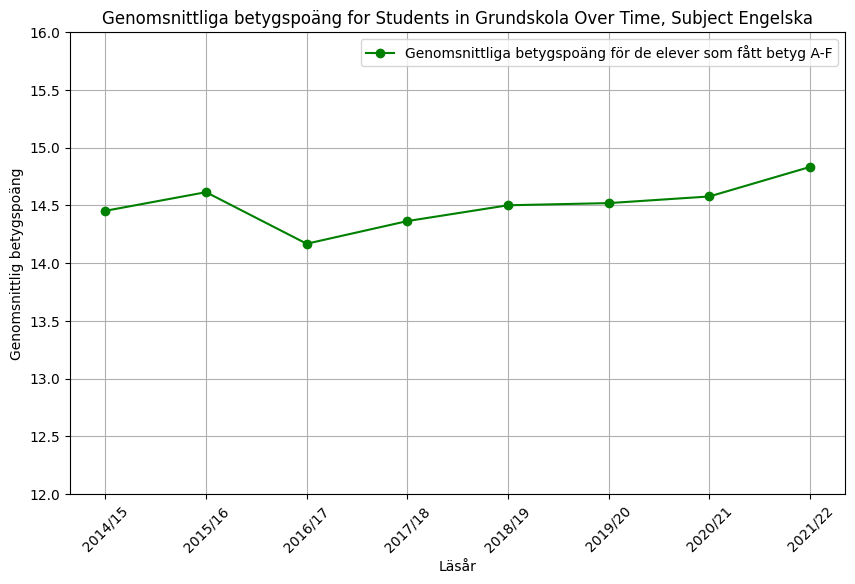

In [5]:
# Step 3 - A Side Analysis - Plot for Genomsnittlig Betygspoäng 

# Columns to keep 
df_plot = df[['skolform', 'läsår', 'totalt_betygspoäng']]

# Replacing . and .. with np.nan in the gpb_DataFrame
df_plot.replace(['.', '..'], np.nan, inplace=True)

# Extract the last two digits (YY) for sorting
df_plot['läsår_numeric'] = df_plot['läsår'].str[-2:].astype(int)

# Group by 'läsår' and calculate the mean
df_plot = df_plot.groupby(['läsår', 'läsår_numeric']).agg(
    {'totalt_betygspoäng': 'mean'}
).reset_index()

# Sort DataFrame by 'läsår_numeric' (ensures chronological order)
df_plot = df_plot.sort_values(by='läsår_numeric')

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(df_plot['läsår'],  # Using 'läsår' (YYYY/YY) for x-axis labels
         df_plot['totalt_betygspoäng'], 
         marker='o', 
         label='Genomsnittliga betygspoäng för de elever som fått betyg A-F',
         color='green')

# Adjusting Y-axis 
plt.ylim(12, 16)

# Show all years on the X-axis and rotate for better readability
plt.xticks(df_plot['läsår'], rotation=45)

# Add titles and labels
plt.title(f'Genomsnittliga betygspoäng for Students in Grundskola Over Time, Subject {subject_name}')
plt.xlabel('Läsår')
plt.ylabel('Genomsnittlig betygspoäng')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# --- Dropping totalt_betygspoäng from all DataFrames---

# For Loop
for df in dataframes:
    # Dropping specified column
    df.drop('totalt_betygspoäng', axis=1, inplace=True)

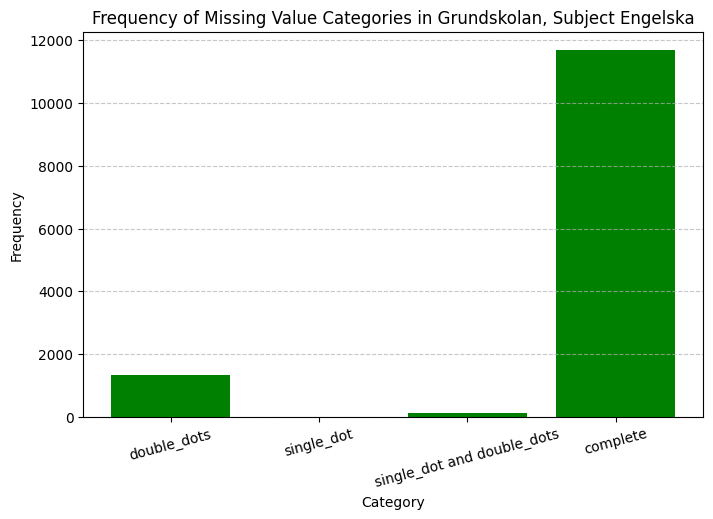

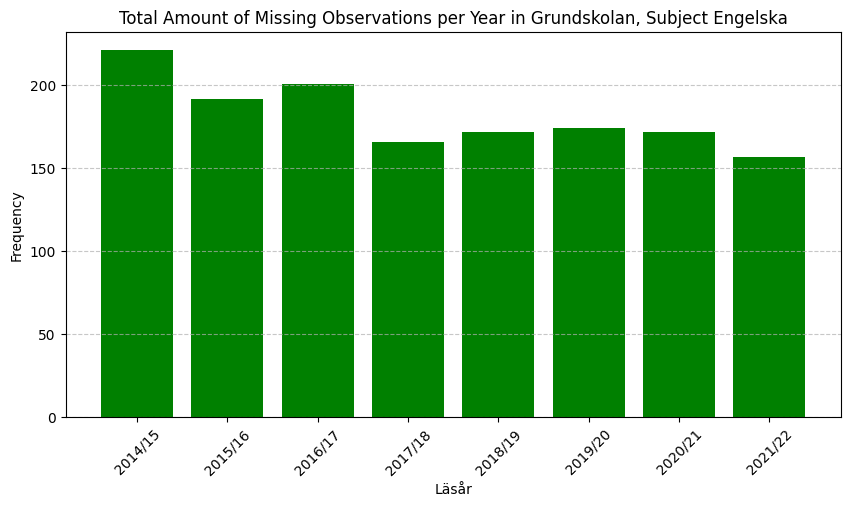

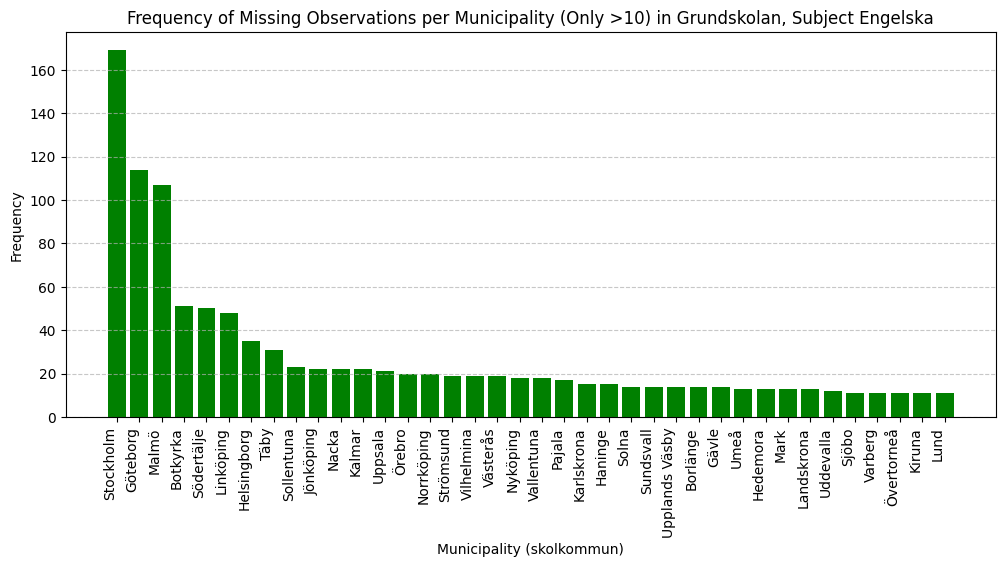

In [6]:
# Step 3 - A Side Analysis - Types of Missing Data

"""
Observera att uppgifter från och med läsåret 2023/24 dubbelprickas om de baseras på färre än 10 elever på skolenhetsnivå 
respektive färre än 5 elever på riks-, läns, kommun- eller huvudmannanivå. Då visas två prickar (..) i stället för utfall.

Tidigare läsår dubbelprickas uppgifter på alla summeringsnivåer om de baseras på färre än 10 elever.
I uppdelningar av flickor och pojkar dubbelprickas antal och andel elever både för flickor och pojkar om det ena könet är dubbelprickat.
Om data saknas visas en prick (.) istället för utfall.
"""

# --- Plot 1: Frequency of Missing Value Categories ---

# Function to classify rows based on presence of '.' and '..'
def classify_missing_rows(row):
    contains_single_dot = (row == '.').any()
    contains_double_dot = (row == '..').any()

    if contains_single_dot and contains_double_dot:
        return "single_dot and double_dots"
    elif contains_double_dot:
        return "double_dots"
    elif contains_single_dot:
        return "single_dot"
    else:
        return "complete"

# Apply classification to both DataFrames
df["missing_data"] = df.apply(classify_missing_rows, axis=1)

# Define all possible category labels to ensure they appear
all_categories = ["double_dots", "single_dot", "single_dot and double_dots", "complete"]

# Count occurrences of each category and reindex to include all categories
category_counts = df['missing_data'].value_counts().reindex(all_categories, fill_value=0)

# Plot the frequency of each category
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color='green')

# Formatting
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title(f"Frequency of Missing Value Categories in Grundskolan, Subject {subject_name}")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# --- Plot 2: Total Amount of Missing Observations per Year ---

# Columns to keep 
df_missing = df[['skol_enhetskod', 'skolkommun', 'typ_av_huvudman', 'andel_elever_A_E', 'läsår', 'skolform']]

# Function to filter rows with '.' or '..'
def filter_missing_rows(df): 
    return df[df.isin(['.', '..']).any(axis=1)]

# Applying to filtered_DataFrame
df_missing = filter_missing_rows(df_missing) 

# Extract the starting year (YYYY) from "YYYY/YY" format
df_missing['läsår_numeric'] = df_missing['läsår'].str[-2:].astype(int)

# Get the full range of years from the available data
all_years = np.arange(df_missing['läsår_numeric'].min(), 
                      df_missing['läsår_numeric'].max() + 1).astype(str)

# Count occurrences of each year and reindex to include all years
year_counts = df_missing['läsår'].value_counts().reindex(df_missing['läsår'].unique(), fill_value=0)

# Plot the frequency of missing values per year
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color='green')

# Formatting
plt.xlabel("Läsår")
plt.ylabel("Frequency")
plt.title(f'Total Amount of Missing Observations per Year in Grundskolan, Subject {subject_name}')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# --- Plot 3: Frequency of Missing Observations per Municipality ---

# Count occurrences of each municipality
kommun_counts = df_missing['skolkommun'].value_counts()

# Filter to keep only municipalities with frequency > 10
kommun_counts = kommun_counts[kommun_counts > 10]

# Plot the frequency of each municipality
plt.figure(figsize=(12, 5))
plt.bar(kommun_counts.index, kommun_counts.values, color='green')

# Formatting
plt.xlabel("Municipality (skolkommun)")
plt.ylabel("Frequency")
plt.title(f"Frequency of Missing Observations per Municipality (Only >10) in Grundskolan, Subject {subject_name}")
plt.xticks(rotation=90, ha="right")  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Deleting from global namespace
del df_missing, df

Tidigare läsår dubbelprickas uppgifter på alla summeringsnivåer om de baseras på färre än 10 elever.
I uppdelningar av flickor och pojkar dubbelprickas antal och andel elever både för flickor och pojkar om det ena könet är dubbelprickat.
Om data saknas visas en prick (.) istället för utfall.

Since . indicates truly missing values, and because there were only a few, we decide to not impute those value
They should not heavily bias our results
We only mark them as np.nan, and drop them when neccesary 

However, there we quite a few .., so we are really worried that the dropping of those variables could bias our results 

Problem of structural censoring / censorship problem
Solution which yield robust inference?

One approach it to impute those values, but this approach is problematic since we are interested in casual inference 

Another approach is just to leave them out, but that could bias our results since those schools could systematically be different
However, we would think that those close (from above) to the .. threshold (i.e., schools with 10-20), 
should be very similar to those close from below to the threshold (i.e., 1-90)

Potential Solutions
Imputing
    # Multiple Imputation (PMM)
    # Simple Mean/Median Impution
Filling in as NA and leaving as is
Dropping NA all together  
Tobit Regression

I also want to use the school_year_size as a grouping in this imputing 
The idea would be to impute based on as close observation as possiblle
The schoold wiht only double_dots have systematic low amount of students 
Thus imputing based on skolkommun, läsår_vår, typ_av_huvudman 

But the correlation observed in these variables could translate over to the outcomes
And either make the correlation stronger or weakes what direction is unkown
perhaps look at a simple correlation mateix 

Could be Missing at random (MAR), 
Could be Missing not at random (MNAR), schools who perform worse are systematically not reporting 

In [7]:
# Step 4 - Modifying the Dataframes based on the Above Analysis

# For Loop to iterate over my list, and dropping columns, and changing . and .. to np.nan
for df in dataframes:

    # Replacing . with np.nan
    df.replace(['.', '..'], np.nan, inplace=True)
  

# # Function to fill missing values using the mean within each group
# def impute_antal_elever(df, method="mean"):
#     if method == "mean":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.mean()))
#     elif method == "median":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.median()))
#     else:
#         raise ValueError("Invalid method. Choose 'mean', 'median', 'ffill', or 'bfill'.")
#     return df

# # Apply the imputation function with the desired method (mean, median, ffill, bfill)
# filtered_nationella_program = impute_antal_elever(filtered_nationella_program, method="mean")

print(DataFrame_I_Engelska)

       skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman  \
0            71387206         Ale        1440         Enskild   
1            48529699         Ale        1440        Kommunal   
2            11043800         Ale        1440        Kommunal   
3            61084420         Ale        1440        Kommunal   
4            74064638    Alingsås        1489        Kommunal   
...               ...         ...         ...             ...   
13266        50308658   Överkalix        2513        Kommunal   
13267        13342436   Överkalix        2513         Enskild   
13268        46252858  Övertorneå        2518         Enskild   
13269        90707437  Övertorneå        2518        Kommunal   
13270        18991431  Övertorneå        2518        Kommunal   

       avgående_skolelever  andel_elever_A_E    läsår    skolform  
0                     42.0              97.6  2014/15  grundskola  
1                    115.0              89.6  2014/15  grundskola  
2              

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_6207/656322427.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(['.', '..'], np.nan, inplace=True)


In [8]:
# Step 5 - Final Adjustment for Grundskola_I_ämne

# For Loop that creates andel_elever_f column in each DataFrame
for df in dataframes:

    # Total Percent 
    PERCENT = 100

    # Creating variable andel_elever_f 
    df['andel_elever_F'] = (PERCENT - df['andel_elever_A_E']).round(1)


# --- Engelska --- 
# Rename columns in grundskola_I_engelska 
DataFrame_I_Engelska.rename(columns={
    'andel_elever_A_E': 'andel_elever_A_E_eng',
    'andel_elever_F': 'andel_elever_F_eng'
}, inplace=True)

# Define the desired column order
column_order = [
'skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform', 'avgående_skolelever', 
'andel_elever_A_E_eng', 'andel_elever_F_eng']
    
# Reorder the DataFrame
DataFrame_I_Engelska = DataFrame_I_Engelska[column_order]

# --- Matematik --- 
# Rename columns in grundskola_I_matematik 
DataFrame_I_Matematik.rename(columns={
    'andel_elever_A_E': 'andel_elever_A_E_ma',
    'andel_elever_F': 'andel_elever_F_ma'
}, inplace=True)

# Define the desired column order
column_order = [
'skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform', 'avgående_skolelever', 
'andel_elever_A_E_ma', 'andel_elever_F_ma']
    
# Reorder the DataFrame
DataFrame_I_Matematik = DataFrame_I_Matematik[column_order]

# --- Svenska --- 

# Rename columns in grundskola_I_svenska
DataFrame_I_Svenska.rename(columns={
    'andel_elever_A_E': 'andel_elever_A_E_sv',
    'andel_elever_F': 'andel_elever_F_sv'
}, inplace=True)

# Define the desired column order
column_order = [
'skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform', 'avgående_skolelever', 
'andel_elever_A_E_sv', 'andel_elever_F_sv']
    
# Reorder the DataFrame
DataFrame_I_Svenska = DataFrame_I_Svenska[column_order]

print(DataFrame_I_Svenska)

       skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman    läsår  \
0            71387206         Ale        1440         Enskild  2014/15   
1            48529699         Ale        1440        Kommunal  2014/15   
2            11043800         Ale        1440        Kommunal  2014/15   
3            61084420         Ale        1440        Kommunal  2014/15   
4            74064638    Alingsås        1489        Kommunal  2014/15   
...               ...         ...         ...             ...      ...   
13138        50308658   Överkalix        2513        Kommunal  2021/22   
13139        13342436   Överkalix        2513         Enskild  2021/22   
13140        46252858  Övertorneå        2518         Enskild  2021/22   
13141        90707437  Övertorneå        2518        Kommunal  2021/22   
13142        18991431  Övertorneå        2518        Kommunal  2021/22   

         skolform  avgående_skolelever  andel_elever_A_E_sv  andel_elever_F_sv  
0      grundskola             

Grundskola - Antal elever per årskurs 2012/13 till 2021/22 Skolenhet

"Uppgifterna avser oktober det valda året."

- Autumn semester year is used in the name of the ExcelFiles
- Manually changing the year in the names of the ExcelFiles to correspond to the spring semester year
- Assumption 'Antal Elever' is the same for the autumn and spring semester

In [9]:
# Step 1 - Antal Elever Grundskola - Creating Dataframe 

path = r'/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/data/grundskola_II'

# Get all Excel files in the folder
all_files = glob.glob(os.path.join(path, "*.xlsx"))

# Sort the files (ascending by default)
all_files.sort()

# Predefined list of LÄSÅR (ensure this list matches the number of files and in the right order of how python reads the folder (ascending or descending))
LÄSÅR = ['2014/15', '2015/16', '2016/17','2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

# Creating a function
def read_excel_files(sheet_name):

    """""
    This function reads each excel file from the specified path and sheet, modifies the dataframes, and then creates a concatenated DataFrame

    Parameters:
    - sheet_name: Only sheet_name to read is Statistik
    """""

    # Create an empty list to store DataFrames
    li = []
    
    # A for loop
    for i, filename in enumerate(all_files):
        
        if i == 0:
            # For the first file, read without skipping rows to extract the header row 
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Extract column names from row index 6, Pandas DataFrame positioning
            column_names = temp_df.iloc[6].tolist()
            # Now read the data, skipping the first 7 rows from the Excel File
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=7)
            # Assign the extracted column names
            df.columns = column_names
        else:
            # For subsequent files, read without skipping rows to locate the matching row
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Locate the row number where the column names match
            column_names_row = temp_df.apply(lambda row: row.tolist() == column_names, axis=1).idxmax()
            # Read the data, skipping rows up to the matching row 
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=column_names_row + 1) # adding 1 since Excel start from index/row 1
            # Assign the extracted column names
            df.columns = column_names

        # Add the "läsår_vår" column using the predefined years list
        df["läsår"] = LÄSÅR[i]

        # Add the "skolform" column with the fixed value 'gymnasieskola'
        df["skolform"] = 'grundskola'

        # Append the DataFrame to the list
        li.append(df)
    
    return pd.concat(li, ignore_index=True)

# Creating DataFrame_II by using the function created 
DataFrame_II = read_excel_files('Statistik')

In [10]:
# Step 2 - Changing column names and dropping columns that will not be used

# Define a list of new column names in the correct order
# Column names for column number 10, 11, 12, and 12 are matched with Gymnasieskola DataFrames column names
new_names = [
    'skola',                                                    # Column 1 Skola 
    'skol_enhetskod',                                           # Column 2 Skol-enhetskod 
    'skolkommun',                                               # Column 3 Skolkommun 
    'kommun_kod',                                               # Column 4 Kommun-kod 
    'typ_av_huvudman',                                          # Column 5 Typ av huvudman 
    'huvudman',                                                 # Column 6 Huvudman
    'huvudman_orgnr',                                           # Column 7 Huvudman orgnr
    'elever_förskoleklass',                                     # Column 8 Elever, förskoleklass
    'andel_flickor_förskoleklass',                              # Column 9 Andel (%) flickor, förskoleklass
    'antal_skolelever',                                         # * Column 10 Elever, årskurs 1-9 
    'andel_tjejer',                                             # * Column 11 Andel (%) flickor, årskurs 1-9 
    'andel_m_utl_bakgr',                                        # * Column 12 Andel (%) elever med utländsk bakgrund, åk 1-9   
    'andel_m_högutb_föräldrar',                                 # * Column 13 Andel (%) elever med föräldrar med eftergymnasial utb., åk 1-9   
    'elever_årskurs1',                                          # Column 14 Elever, årskurs 1
    'elever_årskurs2',                                          # Column 15 Elever, årskurs 2
    'elever_årskurs3',                                          # Column 16 Elever, årskurs 3
    'elever_årskurs4',                                          # Column 17 Elever, årskurs 4
    'elever_årskurs5',                                          # Column 18 Elever, årskurs 5
    'elever_årskurs6',                                          # Column 19 Elever, årskurs 6
    'elever_årskurs7',                                          # Column 20 Elever, årskurs 7
    'elever_årskurs8',                                          # Column 21 Elever, årskurs 8
    'elever_årskurs9',                                          # Column 22 Elever, årskurs 9
    'läsår',                                                    # Column 23 läsår
    'skolform'                                                  # Column 24 skolform
    ]

# Applying the new names 
DataFrame_II.columns = new_names

# Define the list of columns to drop
columns_to_drop = ['skola', 
                   'huvudman', 
                   'huvudman_orgnr',
                   'elever_förskoleklass', 
                   'andel_flickor_förskoleklass', 
                   'elever_årskurs1',                                         
                   'elever_årskurs2',            
                   'elever_årskurs3',                                          
                   'elever_årskurs4',                                          
                   'elever_årskurs5',     
                   'elever_årskurs6',                                         
                   'elever_årskurs7',            
                   'elever_årskurs8',                                          
                   'elever_årskurs9']

# Drop the specified columns
DataFrame_II.drop(columns=columns_to_drop, axis=1, inplace=True)

DataFrame_II

,skol_enhetskod,skolkommun,kommun_kod,typ_av_huvudman,antal_skolelever,andel_tjejer,andel_m_utl_bakgr,andel_m_högutb_föräldrar,läsår,skolform
0,71387206,Ale,1440,Enskild,236,49,..,56,2014/15,grundskola
1,72616393,Ale,1440,Kommunal,168,45,7,45,2014/15,grundskola
2,48529699,Ale,1440,Kommunal,327,48,6,44,2014/15,grundskola
3,11043800,Ale,1440,Kommunal,355,43,28,43,2014/15,grundskola
4,61084420,Ale,1440,Kommunal,393,45,25,42,2014/15,grundskola
...,...,...,...,...,...,...,...,...,...,...
38550,13342436,Överkalix,2513,Enskild,54,44,..,41,2021/22,grundskola
38551,46252858,Övertorneå,2518,Enskild,62,52,19,53,2021/22,grundskola
38552,90707437,Övertorneå,2518,Kommunal,72,56,18,50,2021/22,grundskola
38553,18991431,Övertorneå,2518,Kommunal,147,44,28,37,2021/22,grundskola


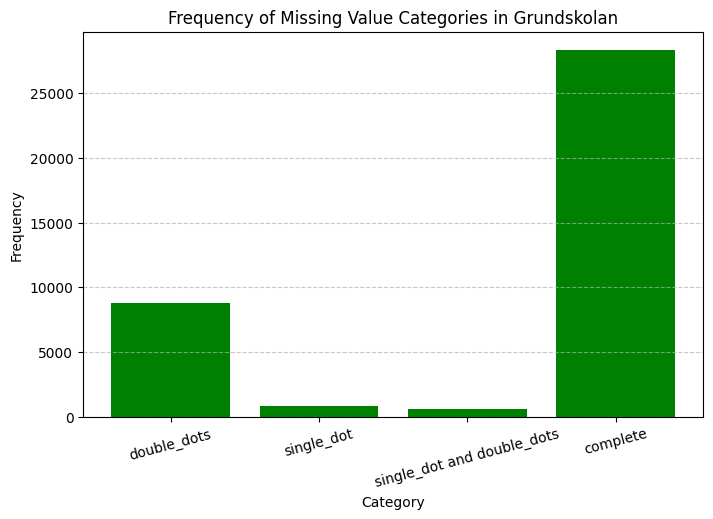

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_6207/1117366962.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_DataFrame_II['läsår_numeric'] = filtered_DataFrame_II['läsår'].str[-2:].astype(int)


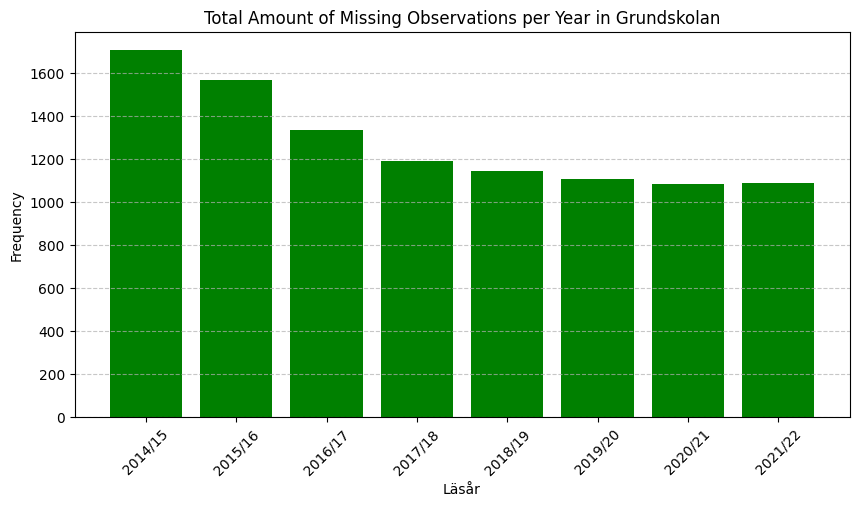

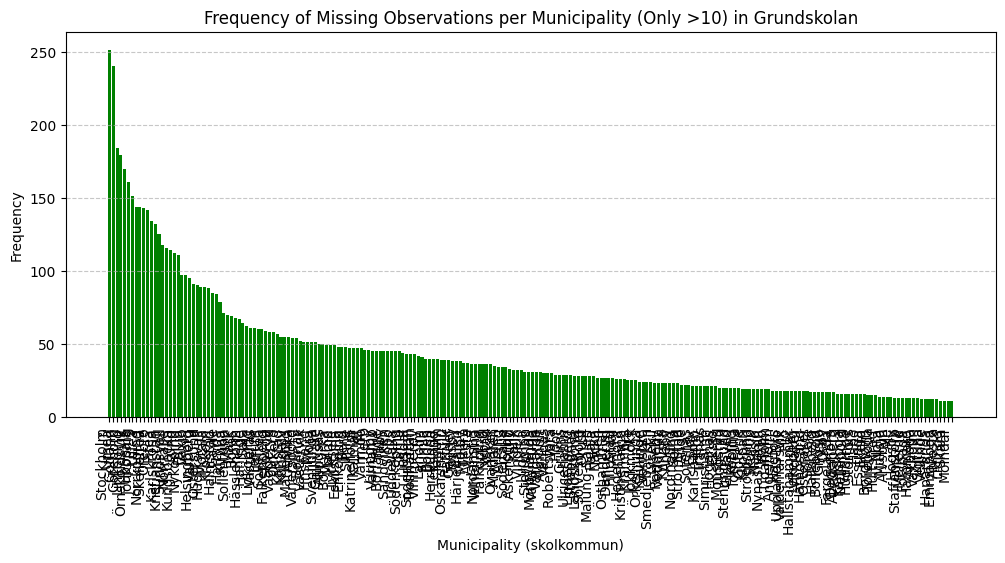

In [11]:
# Step 3 - Analyzing Types of Missing Data

'''
Observera att uppgifter avseende kön, utländsk bakgrund samt föräldrarnas utbildningsnivå från och med läsåret 2020/21 
dubbelprickas om de baseras på färre än 10 elever på skolenhetsnivå respektive färre än 5 elever på kommun- eller huvudmannanivå,
och 3 på läns- och riksnivå. 
Då visas två prickar (..) i stället för utfall.
Undantaget är elever på sameskolan där alla uppgifter prickas om de baseras på färre än 10 elever. 

Om data saknas visas en prick (.) i stället för utfall.

Före läsåret 2020/21 dubbelprickas inga uppgifter 
avseende kön, utländsk bakgrund samt föräldrarnas utbildningsnivå på kommun-, huvudmanna-, läns eller riksnivå.
'''

# --- Plot 1: Frequency of Missing Value Categories ---

# Function to classify rows based on presence of '.' and '..'
def classify_missing_rows(row):
    contains_single_dot = (row == '.').any()
    contains_double_dot = (row == '..').any()

    if contains_single_dot and contains_double_dot:
        return "single_dot and double_dots"
    elif contains_double_dot:
        return "double_dots"
    elif contains_single_dot:
        return "single_dot"
    else:
        return "complete"

# Apply classification to both DataFrames
DataFrame_II["missing_data"] = DataFrame_II.apply(classify_missing_rows, axis=1)

# Define all possible category labels to ensure they appear
all_categories = ["double_dots", "single_dot", "single_dot and double_dots", "complete"]

# Count occurrences of each category and reindex to include all categories
category_counts = DataFrame_II['missing_data'].value_counts().reindex(all_categories, fill_value=0)

# Plot the frequency of each category
plt.figure(figsize=(8, 5))
plt.bar(category_counts.index, category_counts.values, color='green')

# Formatting
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Frequency of Missing Value Categories in Grundskolan")
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Dropping column created for plot 1
DataFrame_II.drop('missing_data', axis = 1, inplace=True)

# --- Plot 2: Total Amount of Missing Observations per Year ---

# Function to filter rows with '.' or '..'
def filter_missing_rows(df): 
    return df[df.isin(['.', '..']).any(axis=1)]

# Applying to filtered_DataFrame
filtered_DataFrame_II = filter_missing_rows(DataFrame_II) 

# Extract the starting year (YYYY) from "YYYY/YY" format
filtered_DataFrame_II['läsår_numeric'] = filtered_DataFrame_II['läsår'].str[-2:].astype(int)

# Get the full range of years from the available data
all_years = np.arange(filtered_DataFrame_II['läsår_numeric'].min(), 
                      filtered_DataFrame_II['läsår_numeric'].max() + 1).astype(str)

# Count occurrences of each year and reindex to include all years
year_counts = filtered_DataFrame_II['läsår'].value_counts().reindex(filtered_DataFrame_II['läsår'].unique(), fill_value=0)

# Plot the frequency of missing values per year
plt.figure(figsize=(10, 5))
plt.bar(year_counts.index, year_counts.values, color='green')

# Formatting
plt.xlabel("Läsår")
plt.ylabel("Frequency")
plt.title('Total Amount of Missing Observations per Year in Grundskolan')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# --- Plot 3: Frequency of Missing Observations per Municipality ---

# Count occurrences of each municipality
kommun_counts = filtered_DataFrame_II['skolkommun'].value_counts()

# Filter to keep only municipalities with frequency > 10
kommun_counts = kommun_counts[kommun_counts > 10]

# Plot the frequency of each municipality
plt.figure(figsize=(12, 5))
plt.bar(kommun_counts.index, kommun_counts.values, color='green')

# Formatting
plt.xlabel("Municipality (skolkommun)")
plt.ylabel("Frequency")
plt.title("Frequency of Missing Observations per Municipality (Only >10) in Grundskolan")
plt.xticks(rotation=90, ha="right")  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

# Deleting DataFrame from global namespace 
del filtered_DataFrame_II

Analysis here

In [12]:
# Step 4 - Modifying Dataframe_II based on the above analysis

# Replacing . with np.nan for now 
DataFrame_II.replace(['.', '..'], np.nan, inplace=True)

# # Function to fill missing values using the mean within each group
# def impute_antal_elever(df, method="mean"):
#     if method == "mean":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.mean()))
#     elif method == "median":
#         df["antal_elever_totalt"] = df.groupby(['skolkommun', 'läsår_vår', 'typ_av_huvudman'])['antal_elever_totalt'].transform(lambda x: x.fillna(x.median()))
#     else:
#         raise ValueError("Invalid method. Choose 'mean', 'median', 'ffill', or 'bfill'.")
#     return df

# # Apply the imputation function with the desired method (mean, median, ffill, bfill)
# filtered_nationella_program = impute_antal_elever(filtered_nationella_program, method="mean")

print(DataFrame_II)

       skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman  \
0            71387206         Ale        1440         Enskild   
1            72616393         Ale        1440        Kommunal   
2            48529699         Ale        1440        Kommunal   
3            11043800         Ale        1440        Kommunal   
4            61084420         Ale        1440        Kommunal   
...               ...         ...         ...             ...   
38550        13342436   Överkalix        2513         Enskild   
38551        46252858  Övertorneå        2518         Enskild   
38552        90707437  Övertorneå        2518        Kommunal   
38553        18991431  Övertorneå        2518        Kommunal   
38554        53794508  Övertorneå        2518        Kommunal   

       antal_skolelever  andel_tjejer  andel_m_utl_bakgr  \
0                 236.0          49.0                NaN   
1                 168.0          45.0                7.0   
2                 327.0          48.0  

/var/folders/dk/hpy2mtkd7sq6_2c3125100b80000gn/T/ipykernel_6207/1106353401.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DataFrame_II.replace(['.', '..'], np.nan, inplace=True)


In [13]:
# Step 5 -  Final Modification to the Dataframe_II

# Creating school_size_category
bins = [1, 49, 99, 199, 299, 399, 499, 599, 699, 799, 899, np.inf]
labels = ["1-49", "50-99", "100-199", "200-299", "300-399", "400-499", "500-599", "600-699", "700-799", "800-899", "900+"]

# Create a new column with categorized school sizes
DataFrame_II['school_size'] = pd.cut(DataFrame_II['antal_skolelever'], bins=bins, labels=labels, right=True)

# Define the desired column order
column_order = ['skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform',
                'antal_skolelever',  'school_size',
                'andel_tjejer', 'andel_m_utl_bakgr', 'andel_m_högutb_föräldrar']

# Reorder the DataFrame
DataFrame_II = DataFrame_II[column_order]

print(DataFrame_II)

       skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman    läsår  \
0            71387206         Ale        1440         Enskild  2014/15   
1            72616393         Ale        1440        Kommunal  2014/15   
2            48529699         Ale        1440        Kommunal  2014/15   
3            11043800         Ale        1440        Kommunal  2014/15   
4            61084420         Ale        1440        Kommunal  2014/15   
...               ...         ...         ...             ...      ...   
38550        13342436   Överkalix        2513         Enskild  2021/22   
38551        46252858  Övertorneå        2518         Enskild  2021/22   
38552        90707437  Övertorneå        2518        Kommunal  2021/22   
38553        18991431  Övertorneå        2518        Kommunal  2021/22   
38554        53794508  Övertorneå        2518        Kommunal  2021/22   

         skolform  antal_skolelever school_size  andel_tjejer  \
0      grundskola             236.0     200-29

Grundskola - Personalstatistik med lärarlegitimation och behörighet 2014/15 till 2021/22

"Statistiken avser anställda den 15 oktober valt läsår."

- Autumn semester year is used in the name of the ExcelFiles
- Manually changing the year in the names of the ExcelFiles to correspond to the spring semester year
- Assumption 'Personalstatistik med lärarlegitimation och behörighet' is the same for the autumn and spring semester

In [14]:
# Step 1 - Creating Dataframe

path = r'/Users/andrescruz/Documents/Handelshögskolan/MSc Economic/Semester 4/5350 Thesis in Economics/data/grundskola_III'

# Get all Excel files in the folder
all_files = glob.glob(os.path.join(path, "*.xlsx"))

# Sort the files (ascending by default)
all_files.sort()

# Predefined list of years (ensure this list matches the number of files and in the right order of how python reads the folder (ascending or descending))
LÄSÅR = ['2014/15', '2015/16', '2016/17','2017/18', '2018/19', '2019/20', '2020/21', '2021/22']

# Defining a function 
def read_excel_files(sheet_name):

    """""
    This function reads each excel file from the specified path and sheet, modifies the dataframes, and then creates a concatenated DataFrame

    Parameters:
    - sheet_name: specify which sheet_name to read
    """""

    # Create an empty list to store DataFrames
    li = []
    
    # A for loop
    for i, filename in enumerate(all_files):
        
        if i == 0:
            # For the first file, read without skipping rows to extract the header row 
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Extract column names from row index 9, Pandas DataFrame positioning
            column_names = temp_df.iloc[8].tolist()
            # Now read the data, skipping the first 10 rows from the Excel File
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=9)
            # Assign the extracted column names
            df.columns = column_names
        else:
            # For subsequent files, read without skipping rows to locate the matching row
            temp_df = pd.read_excel(filename, sheet_name=sheet_name, header=None)
            # Locate the row number where the column names match
            column_names_row = temp_df.apply(lambda row: row.tolist() == column_names, axis=1).idxmax()
            # Read the data, skipping rows up to the matching row 
            df = pd.read_excel(filename, sheet_name=sheet_name, header=None, skiprows=column_names_row + 1) # adding 1 since Excel start from index/row 1
            # Assign the extracted column names
            df.columns = column_names

        # Add the "läsår_vår" column using the predefined years list
        df["läsår_vår"] = LÄSÅR[i]

        # Add the "skolform" column with the fixed value 'gymnasieskola'
        df["skolform"] = 'grundskola'

        # Append the DataFrame to the list
        li.append(df)
    
    return pd.concat(li, ignore_index=True)

# Applying the function to each specific program
DataFrame_III = read_excel_files('Statistik')

print(DataFrame_III)

                             Skola  Skol-enhetskod  Skolkommun  Kommun-kod  \
0              Ahlafors Fria skola        71387206         Ale        1440   
1                       Alboskolan        72616393         Ale        1440   
2                  Aroseniusskolan        48529699         Ale        1440   
3                      Bohusskolan        11043800         Ale        1440   
4                   Da Vinciskolan        61084420         Ale        1440   
...                            ...             ...         ...         ...   
37536           Överkalix Friskola        13342436   Överkalix        2513   
37537  Hietaniemi Friskoleförening        46252858  Övertorneå        2518   
37538    Svanstein skola Diamanten        90707437  Övertorneå        2518   
37539        Svarträvens skola 4-9        18991431  Övertorneå        2518   
37540        Svarträvens skola F-3        53794508  Övertorneå        2518   

      Typ av huvudman                          Huvudman  Huvudm

In [15]:
# Step 2  - Renaming columns and dropping columns

# Define a list of new column names in the correct order
new_column_names = [
    'skola',                                                  # Column 1 'Skola'
    'skol_enhetskod',                                         # Column 2 'Skol-enhetskod'
    'skolkommun',                                             # Column 3 'Skolkommun'
    'kommun_kod',                                             # Column 4 'Kommun-kod'
    'typ_av_huvudman',                                        # Column 5 'Typ av huvudman'
    'huvudman',                                               # Column 6 'Huvudman'
    'huvudman_orgnr',                                         # Column 7 'Huvudman orgnr'
    'heltid_antal_lärare',                                    # Column 8 'Heltidstjänster Totalt antal'
    'heltid_antal_lärare_legitimation_behörighet',            # Column 9 'Heltidstjänster Antal med lärarlegitimation och behörighet'
    'heltid_andel_lärare_legitimation_behörighet',            # Column 10 'Heltidstjänster Andel med lärarlegitimation och behörighet'
    'heltid_förstelärare',                                    # Column 11 'Heltidstjänster Förstelärare'
    'tjänst_antal_lärare',                                    # Column 12 'Tjänstgörande lärare Totalt antal '
    'tjänst_antal_lärare_legitimation_behörighet',            # Column 13 'Tjänstgörande lärare Antal med lärarlegitimation och behörighet i minst ett ämne'
    'tjänst_andel_lärare_legitimation_behörighet',            # Column 14 'Tjänstgörande lärare Andel med lärarlegitimation och behörighet i minst ett ämne'
    'tjänst_förstelärare',                                    # Column 15 'Tjänstgörande lärare Förstelärare '
    'läsår',                                                  # Column 16 'läsår'
    'skolform'                                                # Column 17 'skolform'
    ]

# Define a list of columns to drop
columns_to_drop = [
    'skola',                                                  # Column 1 'Skola'
    'huvudman',                                               # Column 6 'Huvudman'
    'huvudman_orgnr',                                         # Column 7 'Huvudman orgnr'
    'heltid_förstelärare',                                    # Column 11 'Heltidstjänster Förstelärare'
    'tjänst_förstelärare',                                    # Column 15 'Tjänstgörande lärare Förstelärare '
    ]

# Define the desired column order
column_order = ['skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform',
                'heltid_antal_lärare', 'heltid_antal_lärare_legitimation_behörighet', 'heltid_andel_lärare_legitimation_behörighet',            
                'tjänst_antal_lärare', 'tjänst_antal_lärare_legitimation_behörighet', 'tjänst_andel_lärare_legitimation_behörighet']  

# Assigning new column names
DataFrame_III.columns = new_column_names 

# Dropping columns which will not be used
DataFrame_III.drop(columns=columns_to_drop, axis=1, inplace=True)

# Reorder the DataFrame
DataFrame_III = DataFrame_III[column_order]

print(DataFrame_III)

       skol_enhetskod  skolkommun  kommun_kod typ_av_huvudman    läsår  \
0            71387206         Ale        1440         Enskild  2014/15   
1            72616393         Ale        1440        Kommunal  2014/15   
2            48529699         Ale        1440        Kommunal  2014/15   
3            11043800         Ale        1440        Kommunal  2014/15   
4            61084420         Ale        1440        Kommunal  2014/15   
...               ...         ...         ...             ...      ...   
37536        13342436   Överkalix        2513         Enskild  2021/22   
37537        46252858  Övertorneå        2518         Enskild  2021/22   
37538        90707437  Övertorneå        2518        Kommunal  2021/22   
37539        18991431  Övertorneå        2518        Kommunal  2021/22   
37540        53794508  Övertorneå        2518        Kommunal  2021/22   

         skolform  heltid_antal_lärare  \
0      grundskola                 15.1   
1      grundskola          

Grundskola - Kombinerar DataFrames

Grundskola I - Slutbetyg per ämne årskurs 9, fr.o.m. 2012/13 till 2021/22
- grundskola_I_engelska
- grundskola_I_matematik
- grundskola_I_svenska

Grundskola - Antal elever per årskurs 2012/13 till 2021/22 Skolenhet
- grundskola_II_antal_elever

Grundskola - Personalstatistik med lärarlegitimation och behörighet 2014/15 till 2021/22
- grundskola_III_personalstatistik

In [16]:
# --- Step 1 Merging DataFrames --- 

# https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/
# Using LEFT JOIN
# Grundskola_I <- Grundskola_II  
# Grundskola_I <- Grundskola_III

# Define the join keys (columns that will NOT receive suffixes)
join_keys = ['skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform']

# --- Engelska ---

# Merge the first two DataFrames with an left join and custom suffixes:
DataFrame_Engelska = pd.merge(
    DataFrame_I_Engelska,
    DataFrame_II, 
    on = join_keys,
    how = 'left')

# Merge the first two DataFrames with an inner join and custom suffixes:
DataFrame_Engelska = pd.merge(
    DataFrame_Engelska,
    DataFrame_III, 
    on = join_keys,
    how = 'left')

# --- Matematik --- 

# Merge the first two DataFrames with an left join and custom suffixes:
DataFrame_Matematik = pd.merge(
    DataFrame_I_Matematik,
    DataFrame_II, 
    on = join_keys,
    how = 'left')

# Merge the first two DataFrames with an inner join and custom suffixes:
DataFrame_Matematik = pd.merge(
    DataFrame_Matematik,
    DataFrame_III, 
    on = join_keys,
    how = 'left')

# --- Svenska --- 

# Merge the first two DataFrames with an left join and custom suffixes:
DataFrame_Svenska = pd.merge(
    DataFrame_I_Svenska,
    DataFrame_II, 
    on = join_keys,
    how = 'left')

# Merge the first two DataFrames with an inner join and custom suffixes:
DataFrame_Svenska = pd.merge(
    DataFrame_Svenska,
    DataFrame_III, 
    on = join_keys,
    how = 'left')

# --- Step 2 Preparing for exporting DataFrames --- 

# Define common columns to keep in all subsets
common_columns = [
    'skol_enhetskod', 'skolkommun', 'kommun_kod', 'typ_av_huvudman', 'läsår', 'skolform',
    'school_size', 'antal_skolelever', 'avgående_skolelever', 
    'andel_tjejer', 'andel_m_utl_bakgr', 'andel_m_högutb_föräldrar', 
    'heltid_antal_lärare', 'heltid_antal_lärare_legitimation_behörighet', 'heltid_andel_lärare_legitimation_behörighet', 
    'tjänst_antal_lärare', 'tjänst_antal_lärare_legitimation_behörighet', 'tjänst_andel_lärare_legitimation_behörighet'
]

# Define specific columns for each subject
engelska_columns = common_columns + ['andel_elever_A_E_eng', 'andel_elever_F_eng']
matematik_columns = common_columns + ['andel_elever_A_E_ma', 'andel_elever_F_ma']
svenska_columns = common_columns + ['andel_elever_A_E_sv', 'andel_elever_F_sv']

# Create separate DataFrames
grundskola_engelska = DataFrame_Engelska[engelska_columns]
grundskola_matematik = DataFrame_Matematik[matematik_columns]
grundskola_svenska = DataFrame_Svenska[svenska_columns]

# -- Step 3 Exporting --- 

# Exporting all the tables created into one Excel File 
with pd.ExcelWriter('grundskola.xlsx') as writer:
    grundskola_engelska.to_excel(writer, sheet_name = 'Engelska', index=False)
    grundskola_matematik.to_excel(writer, sheet_name = 'Matematik', index=False)
    grundskola_svenska.to_excel(writer, sheet_name = 'Svenska', index=False)